In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler


In [3]:
X,y = make_moons(n_samples=300,noise=0.5,random_state=42)

In [5]:
X.shape

(300, 2)

In [6]:
y.shape

(300,)

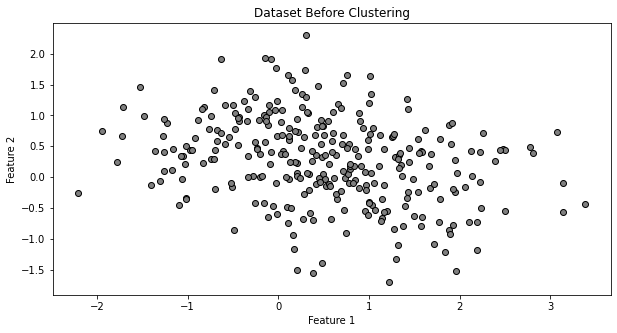

In [7]:
# visualize the dataset before clustering
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(X[:,0],X[:,1],c='gray',edgecolor='k')
plt.title('Dataset Before Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [8]:
# standardize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Step 4: Apply DBSCAN
# eps: Maximum distance between two samples to be considered in the same neighborhood
# min_samples: Minimum number of samples in a neighborhood to form a cluster


dbscan = DBSCAN(eps=0.2,min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

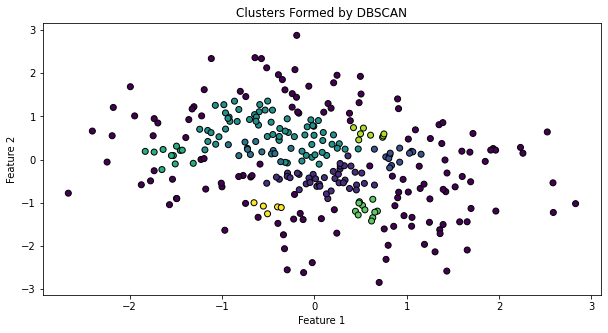

In [12]:
# Step 5: Visualize the clusters formed by DBSCAN
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', edgecolor='k')
plt.title('Clusters Formed by DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
# Step 6: Print cluster information
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)  # Exclude noise points
num_noise_points = list(clusters).count(-1)

print(f'Number of clusters formed: {num_clusters}')
print(f'Number of noise points: {num_noise_points}')

Number of clusters formed: 8
Number of noise points: 135


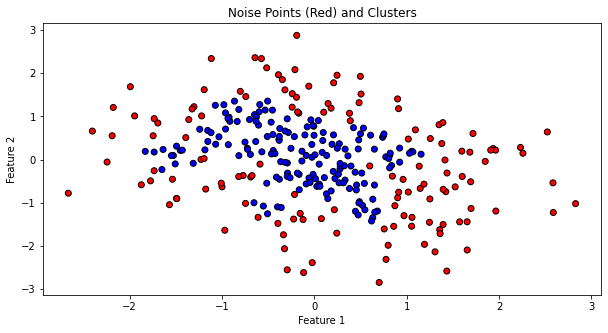

In [14]:
# Step 7: Visualize noise points
plt.figure(figsize=(10, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=['red' if label == -1 else 'blue' for label in clusters], edgecolor='k')
plt.title('Noise Points (Red) and Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()